In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import richdem as rd

Leer la Data

In [2]:
filename = './data/02/02.tif'
filename = './data/02/DEM.tif'
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)

Reemplazar valores faltantes

In [3]:
print(len(data_array[data_array != nodataval]) / (len(data_array[data_array != nodataval]) +
      len(data_array[data_array == nodataval])))
data_array = np.where(data_array == nodataval, np.nan, data_array)

0.47776791548846187


Graficar la data

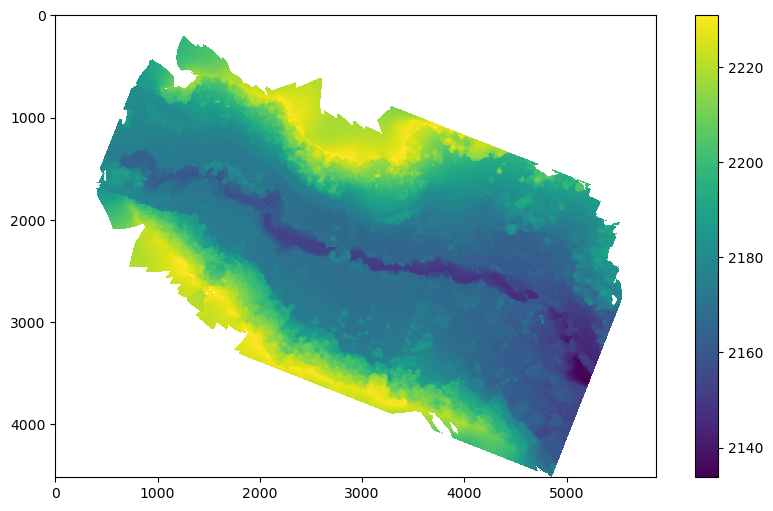

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(data_array, interpolation='none')
plt.colorbar()
plt.show()

Graficar Curvas de nivel

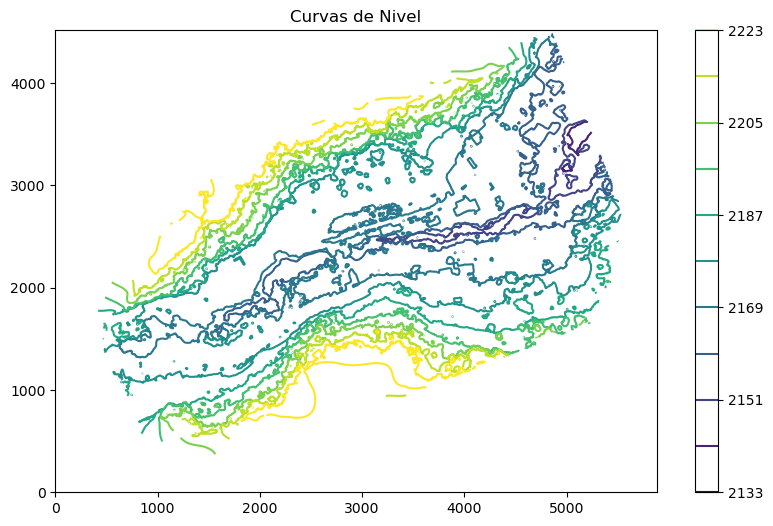

In [5]:
fig = plt.figure(figsize=(10, 6))
min = np.nanmin(data_array)
max = np.nanmax(data_array)
plt.contour(data_array, cmap="viridis",
            levels=list(range(int(min), int(max), int((max - min) / 10))))
plt.title("Curvas de Nivel")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Convertir a rd_array

In [6]:
rd_array = rd.rdarray(data_array, no_data=np.nan)

Graficar angulo de inclinación (en grados)
###### Se calcula la pendiente de una celda focal utilizando una estimación de diferencia central de una superficie ajustada a la celda focal y sus vecinos. La pendiente elegida es la máxima de esta superficie.
###### Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


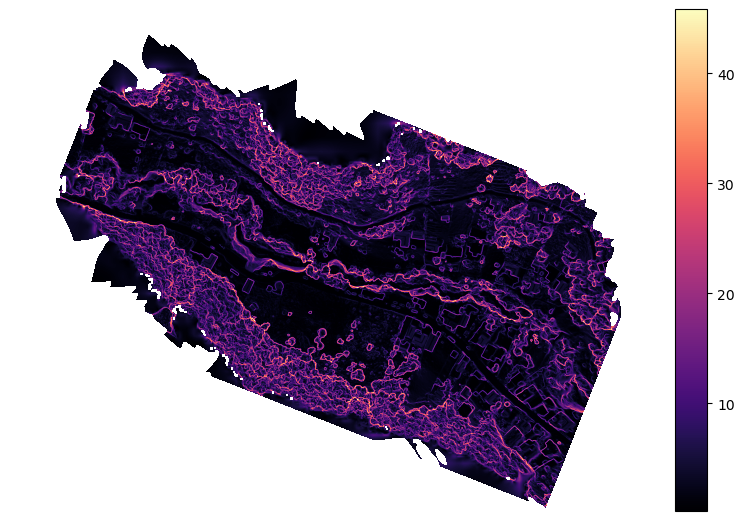

In [7]:
slope = rd.TerrainAttribute(rd_array, attrib='slope_degrees')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()